<a href="https://colab.research.google.com/github/HamzaKotbAddin/Sentiment_Analysis/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Upload the kaggle.json file
from google.colab import files
uploaded = files.upload()

# Step 2: Create the .kaggle directory if it doesn't exist
import os
kaggle_dir = '/root/.kaggle'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

# Step 3: Move the uploaded kaggle.json file to the correct location
import shutil
shutil.move("kaggle.json", os.path.join(kaggle_dir, "kaggle.json"))

# Step 4: Install Kaggle API client
!pip install kaggle

# Step 5: Set permissions for the Kaggle API key
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [4]:
# prompt: import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
# Install the Kaggle API client
!pip install kaggle

# Set permissions to the API key (already uploaded in /root/.kaggle)
!chmod 600 /root/.kaggle/kaggle.json

# Now you can download the dataset
!kaggle datasets download -d snap/amazon-fine-food-reviews


Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
 98% 238M/242M [00:02<00:00, 103MB/s]
100% 242M/242M [00:02<00:00, 86.9MB/s]


In [6]:
import zipfile

# Unzip the downloaded file
with zipfile.ZipFile('amazon-fine-food-reviews.zip', 'r') as zip_ref:
    zip_ref.extractall('amazon-fine-food-reviews')

# List the extracted files
import os
os.listdir('amazon-fine-food-reviews')


['database.sqlite', 'hashes.txt', 'Reviews.csv']

In [7]:

# Example: Load the reviews dataset
df = pd.read_csv('amazon-fine-food-reviews/Reviews.csv')

# View the first few rows of the DataFrame
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


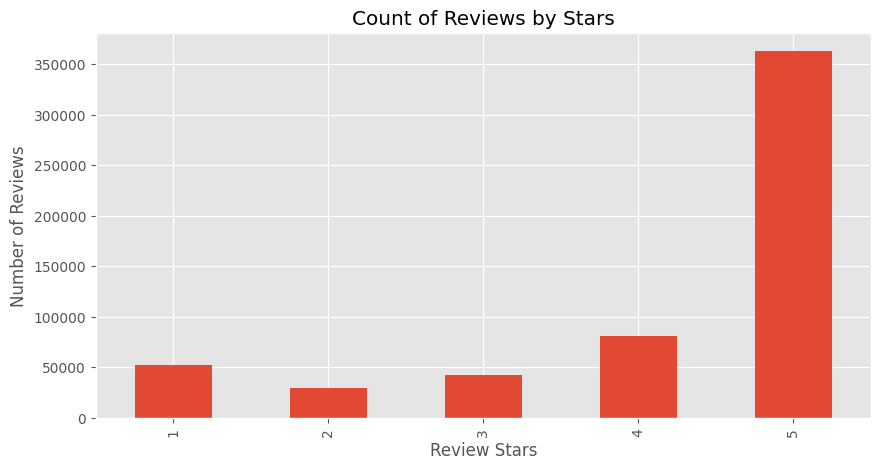

In [8]:
df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))
plt.xlabel('Review Stars')
plt.ylabel('Number of Reviews')
plt.show()

In [15]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  got/VBD
  a/DT
  wild/JJ
  hair/NN
  for/IN
  taffy/NN
  and/CC
  ordered/VBD
  this/DT
  five/CD
  pound/NN
  bag/NN
  ./.
  The/DT
  taffy/NN
  was/VBD
  all/DT
  very/RB
  enjoyable/JJ
  with/IN
  many/JJ
  flavors/NNS
  :/:
  watermelon/NN
  ,/,
  root/NN
  beer/NN
  ,/,
  melon/NN
  ,/,
  peppermint/NN
  ,/,
  grape/NN
  ,/,
  etc/FW
  ./.
  My/PRP$
  only/JJ
  complaint/NN
  is/VBZ
  there/EX
  was/VBD
  a/DT
  bit/NN
  too/RB
  much/JJ
  red/black/NN
  licorice-flavored/JJ
  pieces/NNS
  (/(
  just/RB
  not/RB
  my/PRP$
  particular/JJ
  favorites/NNS
  )/)
  ./.
  Between/IN
  me/PRP
  ,/,
  my/PRP$
  kids/NNS
  ,/,
  and/CC
  my/PRP$
  husband/NN
  ,/,
  this/DT
  lasted/VBN
  only/RB
  two/CD
  weeks/NNS
  !/.
  I/PRP
  would/MD
  recommend/VB
  this/DT
  brand/NN
  of/IN
  taffy/NN
  --/:
  it/PRP
  was/VBD
  a/DT
  delightful/JJ
  treat/NN
  ./.)


In [12]:
example = df['Text'][5]
print(example)

I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.


In [13]:
nltk.word_tokenize(example)
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'got', 'a', 'wild', 'hair', 'for', 'taffy', 'and', 'ordered', 'this']

In [14]:
tagged = nltk.pos_tag(tokens)
tagged[:10]


[('I', 'PRP'),
 ('got', 'VBD'),
 ('a', 'DT'),
 ('wild', 'JJ'),
 ('hair', 'NN'),
 ('for', 'IN'),
 ('taffy', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('this', 'DT')]

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores(example)

{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [18]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [23]:
Vaders = pd.DataFrame(res).T
Vaders = Vaders.reset_index().rename(columns={'index': 'Id'})
Vaders = Vaders.merge(df, how='left')



In [25]:
Vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [26]:
Vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


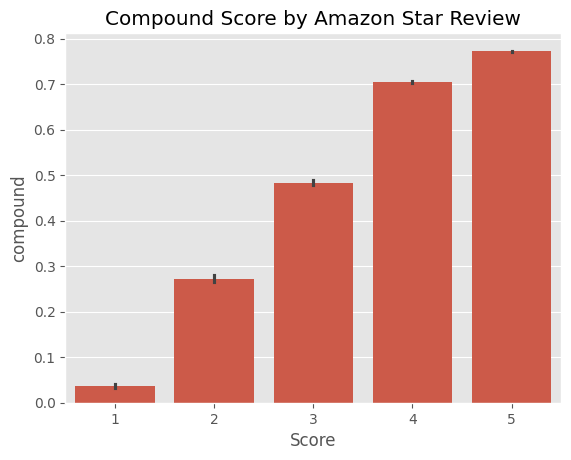

In [29]:
ax =sns.barplot(data=Vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

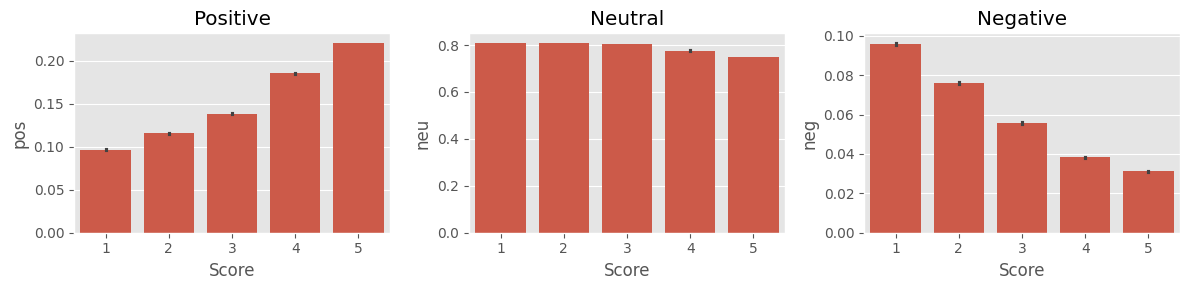

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=Vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=Vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=Vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [34]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax


In [38]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [43]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.006129584, 'roberta_neu': 0.021795832, 'roberta_pos': 0.97207457}


In [48]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict



In [53]:
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm

# Function to process a single row of the DataFrame
def process_row(row_dict):
    try:
        print(f"Processing ID: {row_dict['Id']}")  # Debugging line
        text = row_dict['Text']
        myid = row_dict['Id']

        # VADER sentiment analysis
        Vader_result = sia.polarity_scores(text)
        Vader_result_rename = {f'vader_{key}': value for key, value in Vader_result.items()}

        # RoBERTa sentiment analysis
        Roberta_result = polarity_scores_roberta(text)

        # Merge the results
        both_result = {**Vader_result_rename, **Roberta_result}

        return myid, both_result
    except RuntimeError:
        return row_dict['Id'], {'error': 'RuntimeError'}

# Function to process the first 1000 rows of the DataFrame in parallel
def process_first_1000_reviews(df):
    res = {}

    # Slice the DataFrame to get the first 1000 rows
    df_subset = df.head(1000)

    # Convert the subset of DataFrame rows to a list of dictionaries
    rows = df_subset.to_dict(orient='records')

    # Create a ProcessPoolExecutor to parallelize row processing
    with ProcessPoolExecutor() as executor:
        # Submit each row dictionary to the executor
        futures = {executor.submit(process_row, row): row['Id'] for row in rows}

        # Collect results as they finish
        for future in tqdm(futures, total=len(futures), desc="Processing rows"):
            myid, result = future.result()  # Get the result for each future
            res[myid] = result  # Store the result by ID

    return res

# Run the parallel processing on the first 1000 rows of your DataFrame
res = process_first_1000_reviews(df)


Processing ID: 2Processing ID: 1



Processing rows:   0%|          | 0/1000 [00:00<?, ?it/s]

Processing ID: 3


Processing rows:   0%|          | 1/1000 [00:02<37:37,  2.26s/it]

Processing ID: 4
Processing ID: 5


Processing rows:   0%|          | 3/1000 [00:04<25:14,  1.52s/it]

Processing ID: 6


Processing rows:   0%|          | 5/1000 [00:04<12:44,  1.30it/s]

Processing ID: 7
Processing ID: 8


Processing rows:   1%|          | 6/1000 [00:06<15:13,  1.09it/s]

Processing ID: 9


Processing rows:   1%|          | 8/1000 [00:06<10:33,  1.57it/s]

Processing ID: 10
Processing ID: 11


Processing rows:   1%|          | 10/1000 [00:07<08:17,  1.99it/s]

Processing ID: 12
Processing ID: 13


Processing rows:   1%|          | 11/1000 [00:09<12:30,  1.32it/s]

Processing ID: 14


Processing rows:   1%|▏         | 13/1000 [00:09<08:26,  1.95it/s]

Processing ID: 15
Processing ID: 16

Processing rows:   1%|▏         | 14/1000 [00:09<08:05,  2.03it/s]


Processing ID: 17

Processing rows:   2%|▏         | 15/1000 [00:09<06:42,  2.44it/s]

Processing rows:   2%|▏         | 16/1000 [00:10<07:12,  2.27it/s]

Processing ID: 18


Processing rows:   2%|▏         | 17/1000 [00:10<06:04,  2.70it/s]

Processing ID: 19


Processing rows:   2%|▏         | 18/1000 [00:11<06:44,  2.43it/s]

Processing ID: 20
Processing ID: 21
Processing ID: 22Processing ID: 23

Processing rows:   2%|▏         | 19/1000 [00:12<12:56,  1.26it/s]



Processing ID: 24


Processing rows:   2%|▏         | 22/1000 [00:14<09:31,  1.71it/s]

Processing ID: 25Processing ID: 26

Processing ID: 27


Processing rows:   2%|▎         | 25/1000 [00:15<08:59,  1.81it/s]

Processing ID: 28


Processing rows:   3%|▎         | 27/1000 [00:15<07:12,  2.25it/s]

Processing ID: 29


Processing rows:   3%|▎         | 28/1000 [00:16<08:40,  1.87it/s]

Processing ID: 30


Processing rows:   3%|▎         | 29/1000 [00:18<11:53,  1.36it/s]

Processing ID: 31


Processing rows:   3%|▎         | 30/1000 [00:20<18:09,  1.12s/it]

Processing ID: 32


Processing rows:   3%|▎         | 31/1000 [00:21<16:41,  1.03s/it]

Processing ID: 33


Processing rows:   3%|▎         | 32/1000 [00:22<13:49,  1.17it/s]

Processing ID: 34
Processing ID: 35


Processing rows:   3%|▎         | 33/1000 [00:26<30:51,  1.91s/it]

Processing ID: 36


Processing rows:   4%|▎         | 35/1000 [00:27<18:32,  1.15s/it]

Processing ID: 37


Processing rows:   4%|▎         | 36/1000 [00:28<17:47,  1.11s/it]

Processing ID: 38
Processing ID: 39


Processing rows:   4%|▍         | 38/1000 [00:29<14:03,  1.14it/s]

Processing ID: 40


Processing rows:   4%|▍         | 39/1000 [00:29<13:36,  1.18it/s]

Processing ID: 41


Processing rows:   4%|▍         | 40/1000 [00:30<11:19,  1.41it/s]

Processing ID: 42


Processing rows:   4%|▍         | 41/1000 [00:31<13:03,  1.22it/s]

Processing ID: 43
Processing ID: 44
Processing ID: 45


Processing rows:   4%|▍         | 42/1000 [00:32<15:42,  1.02it/s]

Processing ID: 46


Processing rows:   4%|▍         | 45/1000 [00:33<09:14,  1.72it/s]

Processing ID: 47
Processing ID: 48
Processing ID: 49


Processing rows:   5%|▍         | 47/1000 [00:34<08:33,  1.86it/s]

Processing ID: 50


Processing rows:   5%|▍         | 49/1000 [00:34<06:23,  2.48it/s]

Processing ID: 51


Processing rows:   5%|▌         | 50/1000 [00:34<06:08,  2.58it/s]

Processing ID: 52Processing ID: 53



Processing rows:   5%|▌         | 52/1000 [00:35<06:25,  2.46it/s]

Processing ID: 54
Processing ID: 55
Processing ID: 56


Processing rows:   5%|▌         | 53/1000 [00:37<10:45,  1.47it/s]

Processing ID: 57


Processing rows:   6%|▌         | 56/1000 [00:37<06:13,  2.53it/s]

Processing ID: 58


Processing rows:   6%|▌         | 57/1000 [00:38<07:16,  2.16it/s]

Processing ID: 59


Processing rows:   6%|▌         | 58/1000 [00:38<06:07,  2.57it/s]

Processing ID: 60
Processing ID: 61


Processing rows:   6%|▌         | 59/1000 [00:39<06:50,  2.29it/s]

Processing ID: 62


Processing rows:   6%|▌         | 61/1000 [00:39<05:57,  2.63it/s]

Processing ID: 63
Processing ID: 64
Processing ID: 65

Processing rows:   6%|▋         | 63/1000 [00:40<05:08,  3.03it/s]


Processing ID: 66
Processing ID: 67


Processing rows:   6%|▋         | 64/1000 [00:43<13:22,  1.17it/s]

Processing ID: 68


Processing rows:   7%|▋         | 67/1000 [00:44<10:38,  1.46it/s]

Processing ID: 69


Processing rows:   7%|▋         | 68/1000 [00:45<10:01,  1.55it/s]

Processing ID: 70


Processing rows:   7%|▋         | 69/1000 [00:45<10:05,  1.54it/s]

Processing ID: 71
Processing ID: 72


Processing rows:   7%|▋         | 71/1000 [00:47<10:00,  1.55it/s]

Processing ID: 73


Processing rows:   7%|▋         | 72/1000 [00:47<10:03,  1.54it/s]

Processing ID: 74
Processing ID: 75


Processing rows:   7%|▋         | 73/1000 [00:48<10:08,  1.52it/s]

Processing ID: 76
Processing ID: 77
Processing ID: 78


Processing rows:   7%|▋         | 74/1000 [00:51<18:37,  1.21s/it]

Processing ID: 79
Processing ID: 80

Processing rows:   8%|▊         | 78/1000 [00:51<08:18,  1.85it/s]


Processing ID: 81


Processing rows:   8%|▊         | 80/1000 [00:51<06:33,  2.34it/s]

Processing ID: 82
Processing ID: 83
Processing ID: 84

Processing rows:   8%|▊         | 81/1000 [00:52<06:21,  2.41it/s]


Processing ID: 85


Processing rows:   8%|▊         | 84/1000 [00:52<04:43,  3.23it/s]

Processing ID: 86


Processing rows:   8%|▊         | 85/1000 [00:53<04:27,  3.42it/s]

Processing ID: 87
Processing ID: 88

Processing rows:   9%|▊         | 86/1000 [00:53<04:26,  3.43it/s]

Processing rows:   9%|▊         | 87/1000 [00:53<04:29,  3.39it/s]

Processing ID: 89


Processing rows:   9%|▉         | 88/1000 [00:53<04:04,  3.73it/s]

Processing ID: 90
Processing ID: 91
Processing ID: 92
Processing ID: 93


Processing rows:   9%|▉         | 89/1000 [00:55<07:52,  1.93it/s]

Processing ID: 94


Processing rows:   9%|▉         | 93/1000 [00:55<03:47,  3.99it/s]

Processing ID: 95
Processing ID: 96


Processing rows:   9%|▉         | 94/1000 [00:56<05:58,  2.53it/s]

Processing ID: 97
Processing ID: 98
Processing ID: 99
Processing ID: 100


Processing rows:  10%|▉         | 97/1000 [00:57<06:28,  2.33it/s]

Processing ID: 101


Processing rows:  10%|█         | 100/1000 [00:58<04:35,  3.26it/s]

Processing ID: 102


Processing rows:  10%|█         | 101/1000 [00:58<04:25,  3.39it/s]

Processing ID: 103


Processing rows:  10%|█         | 102/1000 [00:58<03:56,  3.80it/s]

Processing ID: 104
Processing ID: 105


Processing rows:  10%|█         | 103/1000 [00:59<04:58,  3.01it/s]

Processing ID: 106


Processing rows:  10%|█         | 105/1000 [00:59<03:38,  4.10it/s]

Processing ID: 107
Processing ID: 108


Processing rows:  11%|█         | 106/1000 [00:59<04:00,  3.72it/s]

Processing ID: 109


Processing rows:  11%|█         | 108/1000 [01:00<04:06,  3.61it/s]

Processing ID: 110
Processing ID: 111
Processing ID: 112
Processing ID: 113


Processing rows:  11%|█         | 110/1000 [01:02<08:24,  1.76it/s]

Processing ID: 114
Processing ID: 115
Processing ID: 116
Processing ID: 117
Processing ID: 118
Processing ID: 120

Processing rows:  11%|█▏        | 113/1000 [01:07<14:42,  1.00it/s]

Processing ID: 119

Processing ID: 121
Processing ID: 122


Processing rows:  12%|█▏        | 119/1000 [01:11<12:50,  1.14it/s]

Processing ID: 123


Processing rows:  12%|█▏        | 122/1000 [01:12<09:32,  1.53it/s]

Processing ID: 124
Processing ID: 125


Processing rows:  12%|█▏        | 123/1000 [01:13<10:10,  1.44it/s]

Processing ID: 126

Processing rows:  12%|█▏        | 124/1000 [01:14<10:41,  1.37it/s]

Processing rows:  12%|█▎        | 125/1000 [01:14<09:43,  1.50it/s]

Processing ID: 127


Processing rows:  13%|█▎        | 126/1000 [01:14<08:40,  1.68it/s]

Processing ID: 128
Processing ID: 129

Processing rows:  13%|█▎        | 127/1000 [01:14<07:26,  1.95it/s]

Processing rows:  13%|█▎        | 128/1000 [01:15<06:08,  2.37it/s]

Processing ID: 130
Processing ID: 131


Processing rows:  13%|█▎        | 129/1000 [01:15<06:32,  2.22it/s]

Processing ID: 132
Processing ID: 133


Processing rows:  13%|█▎        | 131/1000 [01:16<05:12,  2.78it/s]

Processing ID: 134


Processing rows:  13%|█▎        | 133/1000 [01:16<04:18,  3.36it/s]

Processing ID: 135
Processing ID: 136


Processing rows:  13%|█▎        | 134/1000 [01:16<04:33,  3.17it/s]

Processing ID: 137


Processing rows:  14%|█▎        | 136/1000 [01:17<04:11,  3.44it/s]

Processing ID: 138


Processing rows:  14%|█▎        | 137/1000 [01:17<03:57,  3.64it/s]

Processing ID: 139


Processing rows:  14%|█▍        | 138/1000 [01:17<03:41,  3.88it/s]

Processing ID: 140


Processing rows:  14%|█▍        | 139/1000 [01:17<03:46,  3.80it/s]

Processing ID: 141
Processing ID: 142


Processing rows:  14%|█▍        | 140/1000 [01:18<05:03,  2.84it/s]

Processing ID: 143


Processing rows:  14%|█▍        | 142/1000 [01:18<03:46,  3.80it/s]

Processing ID: 144


Processing rows:  14%|█▍        | 143/1000 [01:19<04:04,  3.50it/s]

Processing ID: 145


Processing rows:  14%|█▍        | 144/1000 [01:19<04:17,  3.33it/s]

Processing ID: 146


Processing rows:  14%|█▍        | 145/1000 [01:20<04:59,  2.86it/s]

Processing ID: 147


Processing rows:  15%|█▍        | 146/1000 [01:20<04:40,  3.05it/s]

Processing ID: 148
Processing ID: 149
Processing ID: 150


Processing rows:  15%|█▍        | 147/1000 [01:21<08:59,  1.58it/s]

Processing ID: 151
Processing ID: 152
Processing ID: 153
Processing ID: 154


Processing rows:  15%|█▌        | 151/1000 [01:22<04:54,  2.88it/s]

Processing ID: 155
Processing ID: 156


Processing rows:  15%|█▌        | 154/1000 [01:22<03:54,  3.61it/s]

Processing ID: 157
Processing ID: 158


Processing rows:  16%|█▌        | 156/1000 [01:23<04:18,  3.26it/s]

Processing ID: 159
Processing ID: 160
Processing ID: 161


Processing rows:  16%|█▌        | 159/1000 [01:25<05:06,  2.74it/s]

Processing ID: 162
Processing ID: 163

Processing rows:  16%|█▌        | 161/1000 [01:25<04:11,  3.33it/s]

Processing rows:  16%|█▌        | 162/1000 [01:25<04:51,  2.88it/s]

Processing ID: 164
Processing ID: 165

Processing rows:  16%|█▋        | 163/1000 [01:26<04:59,  2.80it/s]

Processing rows:  16%|█▋        | 164/1000 [01:27<05:50,  2.39it/s]

Processing ID: 166


Processing rows:  16%|█▋        | 165/1000 [01:27<04:53,  2.84it/s]

Processing ID: 167
Processing ID: 168


Processing rows:  17%|█▋        | 166/1000 [01:28<07:20,  1.90it/s]

Processing ID: 169
Processing ID: 170


Processing rows:  17%|█▋        | 168/1000 [01:29<07:09,  1.94it/s]

Processing ID: 171


Processing rows:  17%|█▋        | 170/1000 [01:29<06:05,  2.27it/s]

Processing ID: 172
Processing ID: 173
Processing ID: 174


Processing rows:  17%|█▋        | 172/1000 [01:31<06:48,  2.03it/s]

Processing ID: 175
Processing ID: 176
Processing ID: 177


Processing rows:  17%|█▋        | 174/1000 [01:34<12:08,  1.13it/s]

Processing ID: 178
Processing ID: 179

Processing rows:  18%|█▊        | 177/1000 [01:35<08:30,  1.61it/s]

Processing rows:  18%|█▊        | 178/1000 [01:35<07:27,  1.84it/s]

Processing ID: 180


Processing rows:  18%|█▊        | 179/1000 [01:35<07:25,  1.84it/s]

Processing ID: 181


Processing rows:  18%|█▊        | 180/1000 [01:36<07:23,  1.85it/s]

Processing ID: 182


Processing rows:  18%|█▊        | 181/1000 [01:36<07:09,  1.91it/s]

Processing ID: 183


Processing rows:  18%|█▊        | 182/1000 [01:37<06:16,  2.17it/s]

Processing ID: 184
Processing ID: 185


Processing rows:  18%|█▊        | 183/1000 [01:39<11:39,  1.17it/s]

Processing ID: 186


Processing rows:  18%|█▊        | 185/1000 [01:39<07:07,  1.91it/s]

Processing ID: 187
Processing ID: 188


Processing rows:  19%|█▊        | 186/1000 [01:39<06:05,  2.23it/s]

Processing ID: 189
Processing ID: 190

Processing rows:  19%|█▉        | 188/1000 [01:39<05:06,  2.65it/s]


Processing ID: 191
Processing ID: 192


Processing rows:  19%|█▉        | 190/1000 [01:40<04:43,  2.85it/s]

Processing ID: 193


Processing rows:  19%|█▉        | 192/1000 [01:40<03:55,  3.42it/s]

Processing ID: 194


Processing rows:  19%|█▉        | 193/1000 [01:41<03:31,  3.81it/s]

Processing ID: 195
Processing ID: 196


Processing rows:  19%|█▉        | 194/1000 [01:41<05:02,  2.66it/s]

Processing ID: 197


Processing rows:  20%|█▉        | 196/1000 [01:42<03:39,  3.66it/s]

Processing ID: 198
Processing ID: 199


Processing rows:  20%|█▉        | 197/1000 [01:42<04:33,  2.94it/s]

Processing ID: 200


Processing rows:  20%|█▉        | 199/1000 [01:42<03:11,  4.17it/s]

Processing ID: 201


Processing rows:  20%|██        | 200/1000 [01:43<03:15,  4.09it/s]

Processing ID: 202


Processing rows:  20%|██        | 201/1000 [01:43<03:32,  3.75it/s]

Processing ID: 203


Processing rows:  20%|██        | 202/1000 [01:43<03:04,  4.33it/s]

Processing ID: 204


Processing rows:  20%|██        | 203/1000 [01:43<03:21,  3.95it/s]

Processing ID: 205
Processing ID: 206


Processing rows:  20%|██        | 204/1000 [01:44<06:24,  2.07it/s]

Processing ID: 207


Processing rows:  21%|██        | 206/1000 [01:45<04:07,  3.21it/s]

Processing ID: 208


Processing rows:  21%|██        | 207/1000 [01:45<03:34,  3.69it/s]

Processing ID: 209


Processing rows:  21%|██        | 208/1000 [01:45<04:21,  3.02it/s]

Processing ID: 210


Processing rows:  21%|██        | 209/1000 [01:46<04:57,  2.66it/s]

Processing ID: 211
Processing ID: 212


Processing rows:  21%|██        | 210/1000 [01:47<08:47,  1.50it/s]

Processing ID: 213
Processing ID: 214


Processing rows:  21%|██        | 212/1000 [01:50<11:49,  1.11it/s]

Processing ID: 215
Processing ID: 216
Processing ID: 217
Processing ID: 218


Processing rows:  21%|██▏       | 214/1000 [01:53<16:29,  1.26s/it]

Processing ID: 219
Processing ID: 220


Processing rows:  22%|██▏       | 218/1000 [01:56<12:59,  1.00it/s]

Processing ID: 221


Processing rows:  22%|██▏       | 220/1000 [01:57<11:25,  1.14it/s]

Processing ID: 222
Processing ID: 223

Processing rows:  22%|██▏       | 221/1000 [01:58<10:57,  1.19it/s]


Processing ID: 224
Processing ID: 225


Processing rows:  22%|██▏       | 224/1000 [02:00<09:32,  1.36it/s]

Processing ID: 226


Processing rows:  22%|██▎       | 225/1000 [02:00<08:10,  1.58it/s]

Processing ID: 227
Processing ID: 228


Processing rows:  23%|██▎       | 226/1000 [02:01<08:17,  1.56it/s]

Processing ID: 229


Processing rows:  23%|██▎       | 228/1000 [02:01<05:19,  2.42it/s]

Processing ID: 230


Processing rows:  23%|██▎       | 229/1000 [02:02<05:18,  2.42it/s]

Processing ID: 231
Processing ID: 232


Processing rows:  23%|██▎       | 231/1000 [02:02<04:41,  2.73it/s]

Processing ID: 233
Processing ID: 234


Processing rows:  23%|██▎       | 232/1000 [02:03<05:29,  2.33it/s]

Processing ID: 235


Processing rows:  23%|██▎       | 234/1000 [02:03<03:44,  3.40it/s]

Processing ID: 236


Processing rows:  24%|██▎       | 235/1000 [02:03<04:08,  3.08it/s]

Processing ID: 237
Processing ID: 238


Processing rows:  24%|██▎       | 236/1000 [02:05<06:22,  2.00it/s]

Processing ID: 239
Processing ID: 240
Processing ID: 241


Processing rows:  24%|██▍       | 238/1000 [02:07<09:18,  1.36it/s]

Processing ID: 242
Processing ID: 243


Processing rows:  24%|██▍       | 241/1000 [02:08<06:46,  1.87it/s]

Processing ID: 244
Processing ID: 245
Processing ID: 246


Processing rows:  24%|██▍       | 244/1000 [02:08<04:59,  2.53it/s]

Processing ID: 247
Processing ID: 248
Processing ID: 249
Processing ID: 250

Processing rows:  25%|██▍       | 246/1000 [02:10<05:58,  2.10it/s]


Processing ID: 251


Processing rows:  25%|██▌       | 250/1000 [02:10<03:49,  3.27it/s]

Processing ID: 252
Processing ID: 253
Processing ID: 254


Processing rows:  25%|██▌       | 251/1000 [02:12<06:38,  1.88it/s]

Processing ID: 255
Processing ID: 256


Processing rows:  25%|██▌       | 254/1000 [02:13<06:34,  1.89it/s]

Processing ID: 257
Processing ID: 258
Processing ID: 259


Processing rows:  26%|██▌       | 256/1000 [02:16<10:13,  1.21it/s]

Processing ID: 260
Processing ID: 261


Processing rows:  26%|██▌       | 259/1000 [02:18<09:05,  1.36it/s]

Processing ID: 262


Processing rows:  26%|██▌       | 261/1000 [02:18<07:00,  1.76it/s]

Processing ID: 263


Processing rows:  26%|██▌       | 262/1000 [02:19<06:31,  1.88it/s]

Processing ID: 264


Processing rows:  26%|██▋       | 263/1000 [02:19<06:21,  1.93it/s]

Processing ID: 265
Processing ID: 266


Processing rows:  26%|██▋       | 264/1000 [02:22<11:44,  1.04it/s]

Processing ID: 267
Processing ID: 268


Processing rows:  27%|██▋       | 267/1000 [02:22<07:44,  1.58it/s]

Processing ID: 269
Processing ID: 270
Processing ID: 271


Processing rows:  27%|██▋       | 268/1000 [02:24<09:25,  1.29it/s]

Processing ID: 272


Processing rows:  27%|██▋       | 271/1000 [02:24<05:39,  2.15it/s]

Processing ID: 273


Processing rows:  27%|██▋       | 272/1000 [02:25<05:48,  2.09it/s]

Processing ID: 274


Processing rows:  27%|██▋       | 273/1000 [02:25<05:04,  2.39it/s]

Processing ID: 275
Processing ID: 276


Processing rows:  28%|██▊       | 275/1000 [02:25<04:15,  2.84it/s]

Processing ID: 277
Processing ID: 278


Processing rows:  28%|██▊       | 276/1000 [02:26<05:59,  2.01it/s]

Processing ID: 279


Processing rows:  28%|██▊       | 278/1000 [02:26<04:03,  2.96it/s]

Processing ID: 280


Processing rows:  28%|██▊       | 279/1000 [02:27<03:39,  3.29it/s]

Processing ID: 281
Processing ID: 282

Processing rows:  28%|██▊       | 280/1000 [02:27<04:34,  2.62it/s]


Processing ID: 283


Processing rows:  28%|██▊       | 282/1000 [02:28<03:50,  3.12it/s]

Processing ID: 284


Processing rows:  28%|██▊       | 283/1000 [02:28<03:23,  3.52it/s]

Processing ID: 285
Processing ID: 286


Processing rows:  28%|██▊       | 284/1000 [02:29<06:09,  1.94it/s]

Processing ID: 287


Processing rows:  29%|██▊       | 286/1000 [02:29<04:23,  2.71it/s]

Processing ID: 288


Processing rows:  29%|██▊       | 287/1000 [02:30<04:56,  2.40it/s]

Processing ID: 289


Processing rows:  29%|██▉       | 288/1000 [02:31<06:42,  1.77it/s]

Processing ID: 290


Processing rows:  29%|██▉       | 289/1000 [02:31<05:53,  2.01it/s]

Processing ID: 291
Processing ID: 292


Processing rows:  29%|██▉       | 291/1000 [02:32<04:47,  2.46it/s]

Processing ID: 293


Processing rows:  29%|██▉       | 292/1000 [02:33<05:36,  2.10it/s]

Processing ID: 294
Processing ID: 295

Processing rows:  29%|██▉       | 293/1000 [02:33<05:12,  2.26it/s]


Processing ID: 296


Processing rows:  29%|██▉       | 294/1000 [02:34<08:09,  1.44it/s]

Processing ID: 297


Processing rows:  30%|██▉       | 296/1000 [02:35<07:44,  1.52it/s]

Processing ID: 298Processing ID: 299

Processing ID: 300


Processing rows:  30%|██▉       | 298/1000 [02:36<07:02,  1.66it/s]

Processing ID: 301
Processing ID: 302
Processing ID: 303


Processing rows:  30%|███       | 300/1000 [02:39<10:03,  1.16it/s]

Processing ID: 304


Processing rows:  30%|███       | 303/1000 [02:40<07:00,  1.66it/s]

Processing ID: 305


Processing rows:  30%|███       | 304/1000 [02:40<06:11,  1.88it/s]

Processing ID: 306


Processing rows:  30%|███       | 305/1000 [02:41<07:41,  1.51it/s]

Processing ID: 307


Processing rows:  31%|███       | 306/1000 [02:42<08:31,  1.36it/s]

Processing ID: 308


Processing rows:  31%|███       | 307/1000 [02:43<07:48,  1.48it/s]

Processing ID: 309


Processing rows:  31%|███       | 308/1000 [02:43<06:29,  1.78it/s]

Processing ID: 310
Processing ID: 311


Processing rows:  31%|███       | 309/1000 [02:44<08:47,  1.31it/s]

Processing ID: 312


Processing rows:  31%|███       | 311/1000 [02:45<06:26,  1.78it/s]

Processing ID: 313


Processing rows:  31%|███       | 312/1000 [02:45<05:50,  1.96it/s]

Processing ID: 314


Processing rows:  31%|███▏      | 313/1000 [02:46<05:16,  2.17it/s]

Processing ID: 315
Processing ID: 316
Processing ID: 317

Processing rows:  31%|███▏      | 314/1000 [02:47<07:50,  1.46it/s]


Processing ID: 318


Processing rows:  32%|███▏      | 316/1000 [02:48<07:17,  1.56it/s]

Processing ID: 319
Processing ID: 320
Processing ID: 321
Processing ID: 322
Processing ID: 323

Processing rows:  32%|███▏      | 318/1000 [02:49<07:13,  1.57it/s]

Processing rows:  32%|███▏      | 322/1000 [02:50<03:42,  3.04it/s]

Processing ID: 324


Processing rows:  32%|███▏      | 323/1000 [02:50<03:29,  3.23it/s]

Processing ID: 325


Processing rows:  32%|███▏      | 324/1000 [02:50<03:09,  3.56it/s]

Processing ID: 326


Processing rows:  32%|███▎      | 325/1000 [02:50<03:05,  3.64it/s]

Processing ID: 327


Processing rows:  33%|███▎      | 326/1000 [02:50<03:06,  3.62it/s]

Processing ID: 328


Processing rows:  33%|███▎      | 327/1000 [02:51<03:19,  3.37it/s]

Processing ID: 329


Processing rows:  33%|███▎      | 328/1000 [02:51<03:13,  3.48it/s]

Processing ID: 330
Processing ID: 331
Processing ID: 332
Processing ID: 333


Processing rows:  33%|███▎      | 329/1000 [02:53<07:32,  1.48it/s]

Processing ID: 334
Processing ID: 335


Processing rows:  33%|███▎      | 334/1000 [02:53<03:24,  3.25it/s]

Processing ID: 336


Processing rows:  34%|███▎      | 335/1000 [02:53<03:03,  3.63it/s]

Processing ID: 337
Processing ID: 338


Processing rows:  34%|███▎      | 336/1000 [02:54<03:37,  3.05it/s]

Processing ID: 339


Processing rows:  34%|███▍      | 338/1000 [02:54<02:47,  3.94it/s]

Processing ID: 340


Processing rows:  34%|███▍      | 339/1000 [02:54<02:33,  4.30it/s]

Processing ID: 341
Processing ID: 342

Processing rows:  34%|███▍      | 340/1000 [02:55<03:36,  3.04it/s]

Processing rows:  34%|███▍      | 341/1000 [02:55<03:34,  3.07it/s]

Processing ID: 343


Processing rows:  34%|███▍      | 342/1000 [02:56<03:07,  3.51it/s]

Processing ID: 344
Processing ID: 345


Processing rows:  34%|███▍      | 343/1000 [02:56<03:43,  2.94it/s]

Processing ID: 346
Processing ID: 347


Processing rows:  34%|███▍      | 345/1000 [02:57<04:13,  2.59it/s]

Processing ID: 348
Processing ID: 349
Processing ID: 350


Processing rows:  35%|███▍      | 348/1000 [02:58<03:33,  3.05it/s]

Processing ID: 351


Processing rows:  35%|███▌      | 350/1000 [02:58<03:07,  3.47it/s]

Processing ID: 352


Processing rows:  35%|███▌      | 351/1000 [02:58<03:15,  3.32it/s]

Processing ID: 353


Processing rows:  35%|███▌      | 352/1000 [02:59<03:40,  2.94it/s]

Processing ID: 354
Processing ID: 355
Processing ID: 356

Processing rows:  35%|███▌      | 353/1000 [03:00<05:34,  1.93it/s]

Processing rows:  36%|███▌      | 355/1000 [03:01<04:38,  2.32it/s]

Processing ID: 357


Processing rows:  36%|███▌      | 356/1000 [03:01<03:59,  2.69it/s]

Processing ID: 358
Processing ID: 359


Processing rows:  36%|███▌      | 357/1000 [03:02<06:55,  1.55it/s]

Processing ID: 360


Processing rows:  36%|███▌      | 359/1000 [03:03<06:09,  1.74it/s]

Processing ID: 361


Processing rows:  36%|███▌      | 360/1000 [03:04<05:18,  2.01it/s]

Processing ID: 362
Processing ID: 363


Processing rows:  36%|███▌      | 361/1000 [03:05<07:01,  1.52it/s]

Processing ID: 364
Processing ID: 365
Processing ID: 366

Processing rows:  36%|███▋      | 363/1000 [03:06<06:41,  1.59it/s]

Processing rows:  36%|███▋      | 365/1000 [03:06<04:27,  2.37it/s]

Processing ID: 367


Processing rows:  37%|███▋      | 366/1000 [03:07<04:51,  2.18it/s]

Processing ID: 368


Processing rows:  37%|███▋      | 367/1000 [03:07<04:26,  2.38it/s]

Processing ID: 369
Processing ID: 370


Processing rows:  37%|███▋      | 368/1000 [03:08<06:21,  1.66it/s]

Processing ID: 371


Processing rows:  37%|███▋      | 370/1000 [03:10<08:27,  1.24it/s]

Processing ID: 372
Processing ID: 373
Processing ID: 374
Processing ID: 375


Processing rows:  37%|███▋      | 371/1000 [03:13<12:30,  1.19s/it]

Processing ID: 376
Processing ID: 377
Processing ID: 378


Processing rows:  38%|███▊      | 376/1000 [03:14<05:46,  1.80it/s]

Processing ID: 379
Processing ID: 380


Processing rows:  38%|███▊      | 378/1000 [03:14<05:05,  2.03it/s]

Processing ID: 381


Processing rows:  38%|███▊      | 380/1000 [03:15<04:17,  2.40it/s]

Processing ID: 382


Processing rows:  38%|███▊      | 381/1000 [03:15<03:55,  2.63it/s]

Processing ID: 383
Processing ID: 384


Processing rows:  38%|███▊      | 383/1000 [03:15<03:32,  2.90it/s]

Processing ID: 385
Processing ID: 386


Processing rows:  38%|███▊      | 384/1000 [03:17<05:36,  1.83it/s]

Processing ID: 387Processing ID: 388



Processing rows:  39%|███▊      | 387/1000 [03:17<04:06,  2.49it/s]

Processing ID: 389
Processing ID: 390


Processing rows:  39%|███▉      | 388/1000 [03:18<05:03,  2.02it/s]

Processing ID: 391


Processing rows:  39%|███▉      | 390/1000 [03:19<03:37,  2.81it/s]

Processing ID: 392
Processing ID: 393


Processing rows:  39%|███▉      | 392/1000 [03:19<02:57,  3.42it/s]

Processing ID: 394


Processing rows:  39%|███▉      | 393/1000 [03:19<02:52,  3.52it/s]

Processing ID: 395


Processing rows:  39%|███▉      | 394/1000 [03:19<02:35,  3.89it/s]

Processing ID: 396


Processing rows:  40%|███▉      | 395/1000 [03:20<02:34,  3.92it/s]

Processing ID: 397
Processing ID: 398


Processing rows:  40%|███▉      | 396/1000 [03:20<02:57,  3.40it/s]

Processing ID: 399


Processing rows:  40%|███▉      | 398/1000 [03:20<02:38,  3.80it/s]

Processing ID: 400
Processing ID: 401
Processing ID: 402


Processing rows:  40%|███▉      | 399/1000 [03:21<04:30,  2.22it/s]

Processing ID: 403


Processing rows:  40%|████      | 402/1000 [03:22<03:02,  3.28it/s]

Processing ID: 404


Processing rows:  40%|████      | 403/1000 [03:22<02:43,  3.66it/s]

Processing ID: 405
Processing ID: 406


Processing rows:  40%|████      | 404/1000 [03:23<05:01,  1.98it/s]

Processing ID: 407


Processing rows:  41%|████      | 406/1000 [03:24<04:37,  2.14it/s]

Processing ID: 408
Processing ID: 409

Processing rows:  41%|████      | 407/1000 [03:25<06:07,  1.62it/s]


Processing ID: 410
Processing ID: 411

Processing rows:  41%|████      | 409/1000 [03:26<05:39,  1.74it/s]


Processing ID: 412

Processing rows:  41%|████      | 410/1000 [03:27<05:03,  1.94it/s]


Processing ID: 413
Processing ID: 414


Processing rows:  41%|████      | 411/1000 [03:29<08:40,  1.13it/s]

Processing ID: 415


Processing rows:  41%|████▏     | 414/1000 [03:30<05:41,  1.72it/s]

Processing ID: 416


Processing rows:  42%|████▏     | 415/1000 [03:30<04:48,  2.03it/s]

Processing ID: 417


Processing rows:  42%|████▏     | 416/1000 [03:31<05:27,  1.78it/s]

Processing ID: 418
Processing ID: 419


Processing rows:  42%|████▏     | 417/1000 [03:33<08:56,  1.09it/s]

Processing ID: 420


Processing rows:  42%|████▏     | 419/1000 [03:33<05:54,  1.64it/s]

Processing ID: 421


Processing rows:  42%|████▏     | 420/1000 [03:34<05:44,  1.69it/s]

Processing ID: 422


Processing rows:  42%|████▏     | 421/1000 [03:34<05:10,  1.87it/s]

Processing ID: 423


Processing rows:  42%|████▏     | 422/1000 [03:34<04:40,  2.06it/s]

Processing ID: 424


Processing rows:  42%|████▏     | 423/1000 [03:34<04:03,  2.37it/s]

Processing ID: 425


Processing rows:  42%|████▏     | 424/1000 [03:35<04:32,  2.11it/s]

Processing ID: 426
Processing ID: 427


Processing rows:  42%|████▎     | 425/1000 [03:37<08:26,  1.14it/s]

Processing ID: 428Processing ID: 429

Processing ID: 430


Processing rows:  43%|████▎     | 428/1000 [03:38<05:02,  1.89it/s]

Processing ID: 431


Processing rows:  43%|████▎     | 430/1000 [03:38<04:28,  2.12it/s]

Processing ID: 432
Processing ID: 433
Processing ID: 434

Processing rows:  43%|████▎     | 431/1000 [03:39<05:17,  1.79it/s]

Processing rows:  43%|████▎     | 433/1000 [03:40<04:08,  2.28it/s]

Processing ID: 435
Processing ID: 436
Processing ID: 437

Processing rows:  44%|████▎     | 435/1000 [03:40<03:38,  2.58it/s]

Processing ID: 438



Processing rows:  44%|████▎     | 437/1000 [03:41<03:16,  2.86it/s]

Processing ID: 439


Processing rows:  44%|████▍     | 438/1000 [03:41<02:54,  3.22it/s]

Processing ID: 440


Processing rows:  44%|████▍     | 439/1000 [03:41<02:53,  3.24it/s]

Processing ID: 441


Processing rows:  44%|████▍     | 440/1000 [03:42<04:08,  2.25it/s]

Processing ID: 442


Processing rows:  44%|████▍     | 441/1000 [03:43<04:09,  2.24it/s]

Processing ID: 443
Processing ID: 444


Processing rows:  44%|████▍     | 442/1000 [03:43<04:15,  2.19it/s]

Processing ID: 445
Processing ID: 446


Processing rows:  44%|████▍     | 444/1000 [03:44<03:52,  2.39it/s]

Processing ID: 447


Processing rows:  45%|████▍     | 446/1000 [03:44<03:00,  3.07it/s]

Processing ID: 448
Processing ID: 449
Processing ID: 450


Processing rows:  45%|████▍     | 447/1000 [03:46<04:56,  1.87it/s]

Processing ID: 451


Processing rows:  45%|████▌     | 450/1000 [03:46<02:57,  3.11it/s]

Processing ID: 452
Processing ID: 453
Processing ID: 454

Processing rows:  45%|████▌     | 451/1000 [03:47<04:43,  1.93it/s]


Processing ID: 455


Processing rows:  45%|████▌     | 453/1000 [03:48<03:51,  2.36it/s]

Processing ID: 456
Processing ID: 457

Processing rows:  46%|████▌     | 455/1000 [03:49<03:48,  2.38it/s]


Processing ID: 458
Processing ID: 459


Processing rows:  46%|████▌     | 456/1000 [03:50<05:44,  1.58it/s]

Processing ID: 460


Processing rows:  46%|████▌     | 459/1000 [03:51<03:51,  2.33it/s]

Processing ID: 461
Processing ID: 462


Processing rows:  46%|████▌     | 460/1000 [03:52<05:11,  1.74it/s]

Processing ID: 463


Processing rows:  46%|████▌     | 461/1000 [03:53<05:26,  1.65it/s]

Processing ID: 464


Processing rows:  46%|████▋     | 463/1000 [03:55<07:09,  1.25it/s]

Processing ID: 465


Processing rows:  46%|████▋     | 464/1000 [03:55<05:37,  1.59it/s]

Processing ID: 466


Processing rows:  46%|████▋     | 465/1000 [03:56<06:40,  1.34it/s]

Processing ID: 467
Processing ID: 468

Processing rows:  47%|████▋     | 466/1000 [03:56<05:34,  1.60it/s]

Processing rows:  47%|████▋     | 467/1000 [04:01<16:11,  1.82s/it]

Processing ID: 469


Processing rows:  47%|████▋     | 468/1000 [04:01<12:10,  1.37s/it]

Processing ID: 470


Processing rows:  47%|████▋     | 469/1000 [04:02<10:06,  1.14s/it]

Processing ID: 471


Processing rows:  47%|████▋     | 470/1000 [04:02<07:43,  1.14it/s]

Processing ID: 472
Processing ID: 473


Processing rows:  47%|████▋     | 471/1000 [04:03<07:07,  1.24it/s]

Processing ID: 474


Processing rows:  47%|████▋     | 473/1000 [04:03<04:09,  2.12it/s]

Processing ID: 475
Processing ID: 476
Processing ID: 477
Processing ID: 478


Processing rows:  47%|████▋     | 474/1000 [04:04<05:47,  1.51it/s]

Processing ID: 479
Processing ID: 480


Processing rows:  48%|████▊     | 478/1000 [04:04<02:49,  3.08it/s]

Processing ID: 481


Processing rows:  48%|████▊     | 480/1000 [04:05<02:30,  3.46it/s]

Processing ID: 482


Processing rows:  48%|████▊     | 481/1000 [04:05<02:19,  3.72it/s]

Processing ID: 483
Processing ID: 484


Processing rows:  48%|████▊     | 482/1000 [04:05<02:28,  3.49it/s]

Processing ID: 485
Processing ID: 486


Processing rows:  48%|████▊     | 484/1000 [04:06<02:34,  3.33it/s]

Processing ID: 487


Processing rows:  49%|████▊     | 486/1000 [04:06<02:09,  3.96it/s]

Processing ID: 488
Processing ID: 489


Processing rows:  49%|████▉     | 488/1000 [04:07<01:54,  4.49it/s]

Processing ID: 490
Processing ID: 491
Processing ID: 492


Processing rows:  49%|████▉     | 489/1000 [04:08<03:33,  2.39it/s]

Processing ID: 493


Processing rows:  49%|████▉     | 492/1000 [04:08<02:33,  3.30it/s]

Processing ID: 494
Processing ID: 495


Processing rows:  49%|████▉     | 493/1000 [04:09<02:51,  2.96it/s]

Processing ID: 496
Processing ID: 497


Processing rows:  50%|████▉     | 495/1000 [04:10<03:10,  2.66it/s]

Processing ID: 498


Processing rows:  50%|████▉     | 497/1000 [04:10<02:17,  3.66it/s]

Processing ID: 499
Processing ID: 500
Processing ID: 501


Processing rows:  50%|████▉     | 498/1000 [04:11<04:05,  2.04it/s]

Processing ID: 502


Processing rows:  50%|█████     | 501/1000 [04:11<02:24,  3.44it/s]

Processing ID: 503
Processing ID: 504


Processing rows:  50%|█████     | 503/1000 [04:12<02:24,  3.43it/s]

Processing ID: 505
Processing ID: 506

Processing rows:  50%|█████     | 504/1000 [04:13<03:44,  2.21it/s]

Processing rows:  50%|█████     | 505/1000 [04:14<03:34,  2.30it/s]

Processing ID: 507


Processing rows:  51%|█████     | 506/1000 [04:14<03:24,  2.42it/s]

Processing ID: 508
Processing ID: 509


Processing rows:  51%|█████     | 507/1000 [04:16<06:09,  1.34it/s]

Processing ID: 510
Processing ID: 511
Processing ID: 512


Processing rows:  51%|█████     | 509/1000 [04:18<07:23,  1.11it/s]

Processing ID: 513


Processing rows:  51%|█████     | 512/1000 [04:19<04:51,  1.67it/s]

Processing ID: 514


Processing rows:  51%|█████▏    | 513/1000 [04:19<04:12,  1.93it/s]

Processing ID: 515


Processing rows:  51%|█████▏    | 514/1000 [04:21<06:21,  1.27it/s]

Processing ID: 516
Processing ID: 517


Processing rows:  52%|█████▏    | 515/1000 [04:22<06:27,  1.25it/s]

Processing ID: 518
Processing ID: 519
Processing ID: 520


Processing rows:  52%|█████▏    | 517/1000 [04:23<05:56,  1.35it/s]

Processing ID: 521


Processing rows:  52%|█████▏    | 520/1000 [04:23<03:54,  2.05it/s]

Processing ID: 522
Processing ID: 523


Processing rows:  52%|█████▏    | 521/1000 [04:25<05:00,  1.60it/s]

Processing ID: 524
Processing ID: 525
Processing ID: 526
Processing ID: 527

Processing rows:  52%|█████▏    | 523/1000 [04:27<06:39,  1.19it/s]

Processing rows:  53%|█████▎    | 526/1000 [04:28<04:10,  1.89it/s]

Processing ID: 528


Processing rows:  53%|█████▎    | 527/1000 [04:28<03:39,  2.15it/s]

Processing ID: 529
Processing ID: 530
Processing ID: 531


Processing rows:  53%|█████▎    | 528/1000 [04:29<04:56,  1.59it/s]

Processing ID: 532


Processing rows:  53%|█████▎    | 531/1000 [04:29<02:51,  2.74it/s]

Processing ID: 533
Processing ID: 534
Processing ID: 535


Processing rows:  53%|█████▎    | 532/1000 [04:30<03:47,  2.06it/s]

Processing ID: 536


Processing rows:  54%|█████▎    | 535/1000 [04:30<02:17,  3.39it/s]

Processing ID: 537
Processing ID: 538
Processing ID: 539


Processing rows:  54%|█████▎    | 537/1000 [04:32<02:57,  2.61it/s]

Processing ID: 540
Processing ID: 541


Processing rows:  54%|█████▍    | 539/1000 [04:32<02:21,  3.25it/s]

Processing ID: 542


Processing rows:  54%|█████▍    | 541/1000 [04:32<02:13,  3.44it/s]

Processing ID: 543


Processing rows:  54%|█████▍    | 542/1000 [04:32<02:06,  3.62it/s]

Processing ID: 544
Processing ID: 545

Processing rows:  54%|█████▍    | 543/1000 [04:33<02:31,  3.01it/s]

Processing ID: 546

Processing ID: 547


Processing rows:  55%|█████▍    | 545/1000 [04:34<02:27,  3.08it/s]

Processing ID: 548
Processing ID: 549
Processing ID: 550


Processing rows:  55%|█████▍    | 547/1000 [04:35<03:10,  2.38it/s]

Processing ID: 551
Processing ID: 552

Processing rows:  55%|█████▌    | 550/1000 [04:35<02:15,  3.31it/s]


Processing ID: 553


Processing rows:  55%|█████▌    | 551/1000 [04:37<03:25,  2.18it/s]

Processing ID: 554


Processing rows:  55%|█████▌    | 553/1000 [04:38<03:51,  1.93it/s]

Processing ID: 555
Processing ID: 556


Processing rows:  55%|█████▌    | 554/1000 [04:39<04:29,  1.66it/s]

Processing ID: 557


Processing rows:  56%|█████▌    | 556/1000 [04:39<03:40,  2.01it/s]

Processing ID: 558


Processing rows:  56%|█████▌    | 557/1000 [04:40<03:35,  2.06it/s]

Processing ID: 559


Processing rows:  56%|█████▌    | 558/1000 [04:40<03:18,  2.22it/s]

Processing ID: 560


Processing rows:  56%|█████▌    | 559/1000 [04:41<03:15,  2.25it/s]

Processing ID: 561


Processing rows:  56%|█████▌    | 560/1000 [04:41<03:36,  2.03it/s]

Processing ID: 562
Processing ID: 563


Processing rows:  56%|█████▌    | 561/1000 [04:43<06:59,  1.05it/s]

Processing ID: 564
Processing ID: 565


Processing rows:  56%|█████▋    | 563/1000 [04:46<07:21,  1.01s/it]

Processing ID: 566Processing ID: 567



Processing rows:  57%|█████▋    | 566/1000 [04:47<05:11,  1.39it/s]

Processing ID: 568


Processing rows:  57%|█████▋    | 567/1000 [04:47<04:38,  1.56it/s]

Processing ID: 569


Processing rows:  57%|█████▋    | 568/1000 [04:48<05:08,  1.40it/s]

Processing ID: 570


Processing rows:  57%|█████▋    | 569/1000 [04:48<04:31,  1.59it/s]

Processing ID: 571


Processing rows:  57%|█████▋    | 570/1000 [04:49<03:49,  1.87it/s]

Processing ID: 572


Processing rows:  57%|█████▋    | 571/1000 [04:49<03:04,  2.32it/s]

Processing ID: 573
Processing ID: 574
Processing ID: 575


Processing rows:  57%|█████▋    | 572/1000 [04:52<08:17,  1.16s/it]

Processing ID: 576
Processing ID: 577
Processing ID: 578


Processing rows:  57%|█████▊    | 575/1000 [04:53<05:45,  1.23it/s]

Processing ID: 579
Processing ID: 580
Processing ID: 581


Processing rows:  58%|█████▊    | 578/1000 [04:55<04:17,  1.64it/s]

Processing ID: 582


Processing rows:  58%|█████▊    | 581/1000 [04:55<02:47,  2.50it/s]

Processing ID: 583


Processing rows:  58%|█████▊    | 582/1000 [04:55<02:46,  2.51it/s]

Processing ID: 584Processing ID: 585

Processing ID: 586


Processing rows:  58%|█████▊    | 584/1000 [04:56<02:23,  2.89it/s]

Processing ID: 587


Processing rows:  59%|█████▊    | 586/1000 [04:56<02:15,  3.05it/s]

Processing ID: 588


Processing rows:  59%|█████▊    | 587/1000 [04:56<02:16,  3.02it/s]

Processing ID: 589


Processing rows:  59%|█████▉    | 588/1000 [04:57<02:21,  2.92it/s]

Processing ID: 590


Processing rows:  59%|█████▉    | 589/1000 [04:57<02:33,  2.68it/s]

Processing ID: 591


Processing rows:  59%|█████▉    | 590/1000 [04:58<02:23,  2.86it/s]

Processing ID: 592


Processing rows:  59%|█████▉    | 591/1000 [04:58<02:11,  3.11it/s]

Processing ID: 593
Processing ID: 594


Processing rows:  59%|█████▉    | 592/1000 [05:00<05:21,  1.27it/s]

Processing ID: 595
Processing ID: 596

Processing rows:  59%|█████▉    | 594/1000 [05:01<05:02,  1.34it/s]

Processing rows:  60%|█████▉    | 595/1000 [05:02<04:20,  1.56it/s]

Processing ID: 597


Processing rows:  60%|█████▉    | 596/1000 [05:03<05:03,  1.33it/s]

Processing ID: 598


Processing rows:  60%|█████▉    | 597/1000 [05:03<04:17,  1.57it/s]

Processing ID: 599


Processing rows:  60%|█████▉    | 598/1000 [05:03<03:54,  1.72it/s]

Processing ID: 600
Processing ID: 601

Processing rows:  60%|█████▉    | 599/1000 [05:04<03:39,  1.83it/s]


Processing ID: 602


Processing rows:  60%|██████    | 600/1000 [05:06<06:04,  1.10it/s]

Processing ID: 603


Processing rows:  60%|██████    | 602/1000 [05:07<05:05,  1.30it/s]

Processing ID: 604
Processing ID: 605


Processing rows:  60%|██████    | 603/1000 [05:12<11:39,  1.76s/it]

Processing ID: 606
Processing ID: 607


Processing rows:  60%|██████    | 605/1000 [05:12<07:41,  1.17s/it]

Processing ID: 608
Processing ID: 609

Processing rows:  61%|██████    | 607/1000 [05:13<05:14,  1.25it/s]

Processing rows:  61%|██████    | 608/1000 [05:13<04:43,  1.38it/s]

Processing ID: 610


Processing rows:  61%|██████    | 609/1000 [05:14<04:16,  1.52it/s]

Processing ID: 611
Processing ID: 612


Processing rows:  61%|██████    | 610/1000 [05:15<05:01,  1.29it/s]

Processing ID: 613
Processing ID: 614
Processing ID: 615


Processing rows:  61%|██████▏   | 613/1000 [05:16<03:26,  1.87it/s]

Processing ID: 616


Processing rows:  62%|██████▏   | 615/1000 [05:16<02:51,  2.25it/s]

Processing ID: 617
Processing ID: 618


Processing rows:  62%|██████▏   | 616/1000 [05:17<02:51,  2.24it/s]

Processing ID: 619
Processing ID: 620Processing ID: 621

Processing rows:  62%|██████▏   | 618/1000 [05:17<02:17,  2.77it/s]

Processing rows:  62%|██████▏   | 620/1000 [05:18<02:05,  3.02it/s]

Processing ID: 622
Processing ID: 623
Processing ID: 624


Processing rows:  62%|██████▏   | 621/1000 [05:19<03:58,  1.59it/s]

Processing ID: 625


Processing rows:  62%|██████▏   | 624/1000 [05:20<02:55,  2.15it/s]

Processing ID: 626


Processing rows:  62%|██████▎   | 625/1000 [05:21<03:12,  1.95it/s]

Processing ID: 627


Processing rows:  63%|██████▎   | 626/1000 [05:21<02:52,  2.17it/s]

Processing ID: 628


Processing rows:  63%|██████▎   | 627/1000 [05:22<02:43,  2.28it/s]

Processing ID: 629


Processing rows:  63%|██████▎   | 628/1000 [05:22<02:33,  2.42it/s]

Processing ID: 630


Processing rows:  63%|██████▎   | 629/1000 [05:23<02:56,  2.10it/s]

Processing ID: 631


Processing rows:  63%|██████▎   | 630/1000 [05:23<02:32,  2.43it/s]

Processing ID: 632
Processing ID: 633


Processing rows:  63%|██████▎   | 631/1000 [05:24<03:45,  1.64it/s]

Processing ID: 634
Processing ID: 635

Processing rows:  63%|██████▎   | 633/1000 [05:26<05:05,  1.20it/s]


Processing ID: 636

Processing rows:  63%|██████▎   | 634/1000 [05:26<04:09,  1.47it/s]

Processing rows:  64%|██████▎   | 635/1000 [05:27<04:05,  1.48it/s]

Processing ID: 637
Processing ID: 638


Processing rows:  64%|██████▎   | 636/1000 [05:29<05:41,  1.07it/s]

Processing ID: 639


Processing rows:  64%|██████▍   | 638/1000 [05:29<03:52,  1.56it/s]

Processing ID: 640
Processing ID: 641

Processing rows:  64%|██████▍   | 639/1000 [05:30<03:41,  1.63it/s]


Processing ID: 642


Processing rows:  64%|██████▍   | 640/1000 [05:31<04:32,  1.32it/s]

Processing ID: 643


Processing rows:  64%|██████▍   | 642/1000 [05:32<03:24,  1.75it/s]

Processing ID: 644


Processing rows:  64%|██████▍   | 643/1000 [05:33<04:07,  1.44it/s]

Processing ID: 645


Processing rows:  64%|██████▍   | 644/1000 [05:33<03:34,  1.66it/s]

Processing ID: 646


Processing rows:  64%|██████▍   | 645/1000 [05:34<03:30,  1.69it/s]

Processing ID: 647


Processing rows:  65%|██████▍   | 646/1000 [05:34<03:22,  1.75it/s]

Processing ID: 648
Processing ID: 649


Processing rows:  65%|██████▍   | 647/1000 [05:35<04:14,  1.39it/s]

Processing ID: 650
Processing ID: 651

Processing rows:  65%|██████▍   | 649/1000 [05:35<02:28,  2.36it/s]


Processing ID: 652


Processing rows:  65%|██████▌   | 650/1000 [05:37<04:58,  1.17it/s]

Processing ID: 653


Processing rows:  65%|██████▌   | 652/1000 [05:38<03:03,  1.90it/s]

Processing ID: 654


Processing rows:  65%|██████▌   | 653/1000 [05:40<06:01,  1.04s/it]

Processing ID: 655
Processing ID: 656Processing ID: 657


Processing rows:  65%|██████▌   | 654/1000 [05:41<05:07,  1.13it/s]

Processing rows:  66%|██████▌   | 656/1000 [05:41<03:22,  1.70it/s]

Processing ID: 658


Processing rows:  66%|██████▌   | 657/1000 [05:41<03:01,  1.89it/s]

Processing ID: 659Processing ID: 660



Processing rows:  66%|██████▌   | 659/1000 [05:42<02:21,  2.41it/s]

Processing ID: 661


Processing rows:  66%|██████▌   | 660/1000 [05:42<02:17,  2.47it/s]

Processing ID: 662


Processing rows:  66%|██████▌   | 661/1000 [05:42<01:57,  2.89it/s]

Processing ID: 663


Processing rows:  66%|██████▌   | 662/1000 [05:43<01:45,  3.22it/s]

Processing ID: 664


Processing rows:  66%|██████▋   | 663/1000 [05:43<01:40,  3.36it/s]

Processing ID: 665
Processing ID: 666
Processing ID: 667


Processing rows:  66%|██████▋   | 664/1000 [05:45<03:42,  1.51it/s]

Processing ID: 668


Processing rows:  67%|██████▋   | 667/1000 [05:45<02:00,  2.75it/s]

Processing ID: 669
Processing ID: 670


Processing rows:  67%|██████▋   | 668/1000 [05:45<02:12,  2.51it/s]

Processing ID: 671


Processing rows:  67%|██████▋   | 670/1000 [05:46<01:54,  2.88it/s]

Processing ID: 672


Processing rows:  67%|██████▋   | 671/1000 [05:46<01:40,  3.29it/s]

Processing ID: 673
Processing ID: 674
Processing ID: 675


Processing rows:  67%|██████▋   | 672/1000 [05:48<03:57,  1.38it/s]

Processing ID: 676
Processing ID: 677


Processing rows:  68%|██████▊   | 675/1000 [05:49<02:48,  1.92it/s]

Processing ID: 678

Processing rows:  68%|██████▊   | 676/1000 [05:49<02:29,  2.17it/s]


Processing ID: 679


Processing rows:  68%|██████▊   | 677/1000 [05:51<03:32,  1.52it/s]

Processing ID: 680


Processing rows:  68%|██████▊   | 679/1000 [05:51<02:18,  2.32it/s]

Processing ID: 681
Processing ID: 682


Processing rows:  68%|██████▊   | 680/1000 [05:52<03:22,  1.58it/s]

Processing ID: 683


Processing rows:  68%|██████▊   | 682/1000 [05:52<02:12,  2.39it/s]

Processing ID: 684
Processing ID: 685


Processing rows:  68%|██████▊   | 683/1000 [05:53<02:35,  2.04it/s]

Processing ID: 686
Processing ID: 687


Processing rows:  68%|██████▊   | 685/1000 [05:54<02:26,  2.15it/s]

Processing ID: 688
Processing ID: 689


Processing rows:  69%|██████▊   | 687/1000 [05:57<03:55,  1.33it/s]

Processing ID: 690


Processing rows:  69%|██████▉   | 689/1000 [05:57<02:55,  1.78it/s]

Processing ID: 691


Processing rows:  69%|██████▉   | 690/1000 [05:57<02:55,  1.76it/s]

Processing ID: 692


Processing rows:  69%|██████▉   | 691/1000 [05:58<03:11,  1.61it/s]

Processing ID: 693
Processing ID: 694
Processing ID: 695
Processing ID: 696


Processing rows:  69%|██████▉   | 693/1000 [06:00<03:12,  1.60it/s]

Processing ID: 697


Processing rows:  70%|██████▉   | 696/1000 [06:00<02:11,  2.32it/s]

Processing ID: 698Processing ID: 699

Processing ID: 700


Processing rows:  70%|██████▉   | 698/1000 [06:01<02:06,  2.39it/s]

Processing ID: 701


Processing rows:  70%|███████   | 700/1000 [06:01<01:35,  3.14it/s]

Processing ID: 702


Processing rows:  70%|███████   | 701/1000 [06:01<01:28,  3.37it/s]

Processing ID: 703


Processing rows:  70%|███████   | 702/1000 [06:02<01:25,  3.49it/s]

Processing ID: 704
Processing ID: 705


Processing rows:  70%|███████   | 704/1000 [06:02<01:12,  4.11it/s]

Processing ID: 706
Processing ID: 707


Processing rows:  71%|███████   | 706/1000 [06:02<01:00,  4.89it/s]

Processing ID: 708


Processing rows:  71%|███████   | 707/1000 [06:02<00:58,  5.01it/s]

Processing ID: 709
Processing ID: 710


Processing rows:  71%|███████   | 709/1000 [06:03<00:50,  5.72it/s]

Processing ID: 711
Processing ID: 712


Processing rows:  71%|███████   | 710/1000 [06:03<01:22,  3.50it/s]

Processing ID: 713


Processing rows:  71%|███████   | 712/1000 [06:04<01:04,  4.45it/s]

Processing ID: 714


Processing rows:  71%|███████▏  | 713/1000 [06:04<01:22,  3.50it/s]

Processing ID: 715
Processing ID: 716


Processing rows:  72%|███████▏  | 715/1000 [06:04<01:11,  4.01it/s]

Processing ID: 717


Processing rows:  72%|███████▏  | 716/1000 [06:05<01:13,  3.88it/s]

Processing ID: 718


Processing rows:  72%|███████▏  | 717/1000 [06:05<01:09,  4.08it/s]

Processing ID: 719


Processing rows:  72%|███████▏  | 718/1000 [06:05<01:01,  4.59it/s]

Processing ID: 720
Processing ID: 721


Processing rows:  72%|███████▏  | 719/1000 [06:06<01:25,  3.28it/s]

Processing ID: 722


Processing rows:  72%|███████▏  | 721/1000 [06:06<01:06,  4.20it/s]

Processing ID: 723


Processing rows:  72%|███████▏  | 722/1000 [06:06<01:00,  4.61it/s]

Processing ID: 724
Processing ID: 725


Processing rows:  72%|███████▏  | 723/1000 [06:06<01:07,  4.11it/s]

Processing ID: 726


Processing rows:  72%|███████▎  | 725/1000 [06:07<00:49,  5.54it/s]

Processing ID: 727
Processing ID: 728
Processing ID: 729


Processing rows:  73%|███████▎  | 726/1000 [06:07<01:15,  3.61it/s]

Processing ID: 730


Processing rows:  73%|███████▎  | 729/1000 [06:07<00:52,  5.12it/s]

Processing ID: 731


Processing rows:  73%|███████▎  | 730/1000 [06:08<00:52,  5.12it/s]

Processing ID: 732


Processing rows:  73%|███████▎  | 731/1000 [06:08<00:56,  4.72it/s]

Processing ID: 733


Processing rows:  73%|███████▎  | 732/1000 [06:08<00:51,  5.16it/s]

Processing ID: 734


Processing rows:  73%|███████▎  | 733/1000 [06:08<00:54,  4.93it/s]

Processing ID: 735
Processing ID: 736


Processing rows:  74%|███████▎  | 735/1000 [06:09<00:59,  4.42it/s]

Processing ID: 737
Processing ID: 738


Processing rows:  74%|███████▎  | 736/1000 [06:10<01:49,  2.40it/s]

Processing ID: 739


Processing rows:  74%|███████▍  | 738/1000 [06:10<01:25,  3.07it/s]

Processing ID: 740


Processing rows:  74%|███████▍  | 739/1000 [06:11<01:29,  2.93it/s]

Processing ID: 741


Processing rows:  74%|███████▍  | 740/1000 [06:11<01:22,  3.13it/s]

Processing ID: 742


Processing rows:  74%|███████▍  | 741/1000 [06:12<02:04,  2.08it/s]

Processing ID: 743
Processing ID: 744


Processing rows:  74%|███████▍  | 742/1000 [06:12<02:13,  1.93it/s]

Processing ID: 745


Processing rows:  74%|███████▍  | 744/1000 [06:13<01:36,  2.64it/s]

Processing ID: 746
Processing ID: 747
Processing ID: 748


Processing rows:  74%|███████▍  | 745/1000 [06:15<02:56,  1.45it/s]

Processing ID: 749
Processing ID: 750
Processing ID: 751
Processing ID: 752


Processing rows:  75%|███████▍  | 748/1000 [06:18<03:35,  1.17it/s]

Processing ID: 753


Processing rows:  75%|███████▌  | 752/1000 [06:18<02:01,  2.05it/s]

Processing ID: 754


Processing rows:  75%|███████▌  | 753/1000 [06:19<02:11,  1.87it/s]

Processing ID: 755


Processing rows:  75%|███████▌  | 754/1000 [06:19<01:59,  2.06it/s]

Processing ID: 756


Processing rows:  76%|███████▌  | 755/1000 [06:19<01:43,  2.36it/s]

Processing ID: 757
Processing ID: 758


Processing rows:  76%|███████▌  | 756/1000 [06:20<01:43,  2.35it/s]

Processing ID: 759


Processing rows:  76%|███████▌  | 758/1000 [06:20<01:19,  3.05it/s]

Processing ID: 760


Processing rows:  76%|███████▌  | 759/1000 [06:20<01:10,  3.43it/s]

Processing ID: 761


Processing rows:  76%|███████▌  | 760/1000 [06:21<01:13,  3.27it/s]

Processing ID: 762
Processing ID: 763


Processing rows:  76%|███████▌  | 761/1000 [06:21<01:49,  2.19it/s]

Processing ID: 764


Processing rows:  76%|███████▋  | 763/1000 [06:22<01:12,  3.28it/s]

Processing ID: 765


Processing rows:  76%|███████▋  | 764/1000 [06:22<01:27,  2.70it/s]

Processing ID: 766


Processing rows:  76%|███████▋  | 765/1000 [06:23<01:28,  2.66it/s]

Processing ID: 767


Processing rows:  77%|███████▋  | 766/1000 [06:23<01:48,  2.15it/s]

Processing ID: 768
Processing ID: 769
Processing ID: 770
Processing ID: 771


Processing rows:  77%|███████▋  | 767/1000 [06:24<02:19,  1.67it/s]

Processing ID: 772
Processing ID: 773
Processing ID: 774
Processing ID: 775
Processing ID: 776


Processing rows:  77%|███████▋  | 771/1000 [06:26<01:42,  2.23it/s]

Processing ID: 777Processing ID: 778

Processing ID: 779


Processing rows:  78%|███████▊  | 777/1000 [06:26<00:55,  4.02it/s]

Processing ID: 780
Processing ID: 781
Processing ID: 782


Processing rows:  78%|███████▊  | 779/1000 [06:27<00:57,  3.84it/s]

Processing ID: 783


Processing rows:  78%|███████▊  | 782/1000 [06:27<00:44,  4.95it/s]

Processing ID: 784
Processing ID: 785
Processing ID: 786


Processing rows:  78%|███████▊  | 783/1000 [06:28<01:14,  2.91it/s]

Processing ID: 787
Processing ID: 788
Processing ID: 789


Processing rows:  79%|███████▊  | 786/1000 [06:29<01:11,  3.01it/s]

Processing ID: 790


Processing rows:  79%|███████▉  | 789/1000 [06:29<00:48,  4.32it/s]

Processing ID: 791
Processing ID: 792


Processing rows:  79%|███████▉  | 791/1000 [06:30<00:50,  4.14it/s]

Processing ID: 793
Processing ID: 794


Processing rows:  79%|███████▉  | 792/1000 [06:31<01:02,  3.30it/s]

Processing ID: 795


Processing rows:  79%|███████▉  | 794/1000 [06:31<00:47,  4.37it/s]

Processing ID: 796
Processing ID: 797
Processing ID: 798


Processing rows:  80%|███████▉  | 796/1000 [06:32<00:56,  3.60it/s]

Processing ID: 799
Processing ID: 800


Processing rows:  80%|███████▉  | 798/1000 [06:32<00:53,  3.76it/s]

Processing ID: 801


Processing rows:  80%|████████  | 800/1000 [06:32<00:40,  4.91it/s]

Processing ID: 802
Processing ID: 803


Processing rows:  80%|████████  | 802/1000 [06:32<00:37,  5.34it/s]

Processing ID: 804


Processing rows:  80%|████████  | 803/1000 [06:33<00:35,  5.60it/s]

Processing ID: 805
Processing ID: 806
Processing ID: 807


Processing rows:  80%|████████  | 804/1000 [06:33<00:56,  3.49it/s]

Processing ID: 808


Processing rows:  81%|████████  | 807/1000 [06:34<00:39,  4.86it/s]

Processing ID: 809


Processing rows:  81%|████████  | 808/1000 [06:34<00:41,  4.64it/s]

Processing ID: 810
Processing ID: 811


Processing rows:  81%|████████  | 810/1000 [06:34<00:41,  4.60it/s]

Processing ID: 812


Processing rows:  81%|████████  | 811/1000 [06:35<00:44,  4.22it/s]

Processing ID: 813


Processing rows:  81%|████████  | 812/1000 [06:35<00:39,  4.75it/s]

Processing ID: 814
Processing ID: 815

Processing rows:  81%|████████▏ | 813/1000 [06:35<00:44,  4.23it/s]

Processing rows:  81%|████████▏ | 814/1000 [06:36<01:00,  3.08it/s]

Processing ID: 816
Processing ID: 817


Processing rows:  82%|████████▏ | 816/1000 [06:36<00:48,  3.82it/s]

Processing ID: 818
Processing ID: 819


Processing rows:  82%|████████▏ | 817/1000 [06:37<01:13,  2.48it/s]

Processing ID: 820


Processing rows:  82%|████████▏ | 819/1000 [06:37<00:59,  3.04it/s]

Processing ID: 821


Processing rows:  82%|████████▏ | 820/1000 [06:38<01:05,  2.76it/s]

Processing ID: 822


Processing rows:  82%|████████▏ | 821/1000 [06:38<00:54,  3.30it/s]

Processing ID: 823


Processing rows:  82%|████████▏ | 822/1000 [06:38<01:03,  2.81it/s]

Processing ID: 824


Processing rows:  82%|████████▏ | 823/1000 [06:39<01:06,  2.67it/s]

Processing ID: 825
Processing ID: 826
Processing ID: 827
Processing ID: 828


Processing rows:  82%|████████▏ | 824/1000 [06:41<02:24,  1.22it/s]

Processing ID: 829
Processing ID: 830


Processing rows:  83%|████████▎ | 829/1000 [06:41<01:00,  2.82it/s]

Processing ID: 831
Processing ID: 832


Processing rows:  83%|████████▎ | 831/1000 [06:42<00:51,  3.30it/s]

Processing ID: 833


Processing rows:  83%|████████▎ | 832/1000 [06:42<00:52,  3.23it/s]

Processing ID: 834


Processing rows:  83%|████████▎ | 833/1000 [06:43<00:56,  2.94it/s]

Processing ID: 835
Processing ID: 836


Processing rows:  83%|████████▎ | 834/1000 [06:43<01:12,  2.28it/s]

Processing ID: 837


Processing rows:  84%|████████▎ | 836/1000 [06:44<00:58,  2.81it/s]

Processing ID: 838
Processing ID: 839


Processing rows:  84%|████████▍ | 838/1000 [06:44<00:50,  3.19it/s]

Processing ID: 840


Processing rows:  84%|████████▍ | 839/1000 [06:45<00:55,  2.90it/s]

Processing ID: 841


Processing rows:  84%|████████▍ | 840/1000 [06:45<01:01,  2.60it/s]

Processing ID: 842


Processing rows:  84%|████████▍ | 841/1000 [06:45<00:52,  3.02it/s]

Processing ID: 843


Processing rows:  84%|████████▍ | 842/1000 [06:46<00:50,  3.10it/s]

Processing ID: 844


Processing rows:  84%|████████▍ | 843/1000 [06:46<00:44,  3.57it/s]

Processing ID: 845
Processing ID: 846


Processing rows:  84%|████████▍ | 844/1000 [06:47<01:12,  2.15it/s]

Processing ID: 847


Processing rows:  85%|████████▍ | 846/1000 [06:47<00:45,  3.36it/s]

Processing ID: 848


Processing rows:  85%|████████▍ | 847/1000 [06:47<00:43,  3.53it/s]

Processing ID: 849
Processing ID: 850
Processing ID: 851


Processing rows:  85%|████████▍ | 849/1000 [06:48<00:38,  3.88it/s]

Processing ID: 852


Processing rows:  85%|████████▌ | 851/1000 [06:48<00:45,  3.25it/s]

Processing ID: 853


Processing rows:  85%|████████▌ | 852/1000 [06:49<00:45,  3.27it/s]

Processing ID: 854


Processing rows:  85%|████████▌ | 853/1000 [06:49<00:38,  3.80it/s]

Processing ID: 855


Processing rows:  85%|████████▌ | 854/1000 [06:49<00:36,  4.00it/s]

Processing ID: 856


Processing rows:  86%|████████▌ | 855/1000 [06:49<00:32,  4.44it/s]

Processing ID: 857


Processing rows:  86%|████████▌ | 856/1000 [06:49<00:31,  4.64it/s]

Processing ID: 858


Processing rows:  86%|████████▌ | 857/1000 [06:50<00:34,  4.09it/s]

Processing ID: 859
Processing ID: 860


Processing rows:  86%|████████▌ | 859/1000 [06:50<00:28,  4.91it/s]

Processing ID: 861
Processing ID: 862
Processing ID: 863
Processing ID: 864
Processing ID: 865
Processing ID: 866


Processing rows:  86%|████████▌ | 860/1000 [06:52<01:21,  1.72it/s]

Processing ID: 867
Processing ID: 868
Processing ID: 869
Processing ID: 870
Processing ID: 871


Processing rows:  87%|████████▋ | 866/1000 [06:54<00:54,  2.44it/s]

Processing ID: 872Processing ID: 873



Processing rows:  87%|████████▋ | 872/1000 [06:54<00:29,  4.27it/s]

Processing ID: 874
Processing ID: 875
Processing ID: 876


Processing rows:  87%|████████▋ | 873/1000 [06:56<00:46,  2.75it/s]

Processing ID: 877
Processing ID: 878


Processing rows:  88%|████████▊ | 876/1000 [06:56<00:36,  3.41it/s]

Processing ID: 879


Processing rows:  88%|████████▊ | 878/1000 [06:56<00:34,  3.56it/s]

Processing ID: 880


Processing rows:  88%|████████▊ | 879/1000 [06:57<00:36,  3.36it/s]

Processing ID: 881


Processing rows:  88%|████████▊ | 880/1000 [06:57<00:33,  3.60it/s]

Processing ID: 882


Processing rows:  88%|████████▊ | 881/1000 [06:58<00:49,  2.42it/s]

Processing ID: 883
Processing ID: 884


Processing rows:  88%|████████▊ | 882/1000 [06:59<00:58,  2.02it/s]

Processing ID: 885
Processing ID: 886


Processing rows:  88%|████████▊ | 885/1000 [06:59<00:37,  3.04it/s]

Processing ID: 887
Processing ID: 888

Processing rows:  89%|████████▊ | 886/1000 [06:59<00:33,  3.35it/s]


Processing ID: 889


Processing rows:  89%|████████▊ | 887/1000 [07:00<00:44,  2.57it/s]

Processing ID: 890


Processing rows:  89%|████████▉ | 889/1000 [07:00<00:30,  3.59it/s]

Processing ID: 891


Processing rows:  89%|████████▉ | 890/1000 [07:01<00:31,  3.48it/s]

Processing ID: 892
Processing ID: 893
Processing ID: 894
Processing ID: 895


Processing rows:  89%|████████▉ | 892/1000 [07:02<00:51,  2.09it/s]

Processing ID: 896


Processing rows:  90%|████████▉ | 895/1000 [07:03<00:36,  2.92it/s]

Processing ID: 897
Processing ID: 898
Processing ID: 899


Processing rows:  90%|████████▉ | 896/1000 [07:05<01:05,  1.58it/s]

Processing ID: 900


Processing rows:  90%|████████▉ | 899/1000 [07:05<00:39,  2.54it/s]

Processing ID: 901
Processing ID: 902


Processing rows:  90%|█████████ | 900/1000 [07:08<01:16,  1.30it/s]

Processing ID: 903
Processing ID: 904


Processing rows:  90%|█████████ | 902/1000 [07:09<01:07,  1.46it/s]

Processing ID: 905
Processing ID: 906
Processing ID: 907


Processing rows:  90%|█████████ | 904/1000 [07:10<01:00,  1.60it/s]

Processing ID: 908


Processing rows:  91%|█████████ | 907/1000 [07:10<00:42,  2.18it/s]

Processing ID: 909
Processing ID: 910
Processing ID: 911


Processing rows:  91%|█████████ | 908/1000 [07:12<00:53,  1.71it/s]

Processing ID: 912


Processing rows:  91%|█████████ | 911/1000 [07:12<00:34,  2.60it/s]

Processing ID: 913
Processing ID: 914
Processing ID: 915


Processing rows:  91%|█████████ | 912/1000 [07:13<00:38,  2.26it/s]

Processing ID: 916


Processing rows:  92%|█████████▏| 915/1000 [07:13<00:23,  3.57it/s]

Processing ID: 917


Processing rows:  92%|█████████▏| 916/1000 [07:13<00:23,  3.55it/s]

Processing ID: 918
Processing ID: 919
Processing ID: 920


Processing rows:  92%|█████████▏| 917/1000 [07:14<00:30,  2.76it/s]

Processing ID: 921


Processing rows:  92%|█████████▏| 920/1000 [07:14<00:17,  4.49it/s]

Processing ID: 922
Processing ID: 923


Processing rows:  92%|█████████▏| 921/1000 [07:14<00:22,  3.50it/s]

Processing ID: 924
Processing ID: 925
Processing ID: 926


Processing rows:  92%|█████████▏| 924/1000 [07:15<00:19,  3.89it/s]

Processing ID: 927
Processing ID: 928


Processing rows:  93%|█████████▎| 927/1000 [07:15<00:15,  4.79it/s]

Processing ID: 929
Processing ID: 930


Processing rows:  93%|█████████▎| 929/1000 [07:16<00:15,  4.61it/s]

Processing ID: 931
Processing ID: 932


Processing rows:  93%|█████████▎| 930/1000 [07:16<00:18,  3.87it/s]

Processing ID: 933
Processing ID: 934


Processing rows:  93%|█████████▎| 932/1000 [07:17<00:19,  3.40it/s]

Processing ID: 935


Processing rows:  93%|█████████▎| 934/1000 [07:17<00:14,  4.53it/s]

Processing ID: 936
Processing ID: 937

Processing rows:  94%|█████████▎| 935/1000 [07:18<00:14,  4.57it/s]


Processing ID: 938
Processing ID: 939


Processing rows:  94%|█████████▎| 936/1000 [07:18<00:19,  3.24it/s]

Processing ID: 940


Processing rows:  94%|█████████▍| 939/1000 [07:18<00:11,  5.24it/s]

Processing ID: 941


Processing rows:  94%|█████████▍| 940/1000 [07:19<00:12,  4.97it/s]

Processing ID: 942
Processing ID: 943
Processing ID: 944


Processing rows:  94%|█████████▍| 942/1000 [07:19<00:13,  4.37it/s]

Processing ID: 945
Processing ID: 946
Processing ID: 947


Processing rows:  94%|█████████▍| 944/1000 [07:20<00:16,  3.38it/s]

Processing ID: 948


Processing rows:  95%|█████████▍| 947/1000 [07:20<00:11,  4.65it/s]

Processing ID: 949


Processing rows:  95%|█████████▍| 948/1000 [07:21<00:10,  4.75it/s]

Processing ID: 950
Processing ID: 951


Processing rows:  95%|█████████▌| 950/1000 [07:21<00:09,  5.28it/s]

Processing ID: 952
Processing ID: 953
Processing ID: 954


Processing rows:  95%|█████████▌| 952/1000 [07:21<00:10,  4.68it/s]

Processing ID: 955
Processing ID: 956


Processing rows:  95%|█████████▌| 954/1000 [07:22<00:10,  4.43it/s]

Processing ID: 957


Processing rows:  96%|█████████▌| 956/1000 [07:22<00:08,  5.07it/s]

Processing ID: 958


Processing rows:  96%|█████████▌| 957/1000 [07:22<00:08,  4.86it/s]

Processing ID: 959


Processing rows:  96%|█████████▌| 958/1000 [07:23<00:09,  4.66it/s]

Processing ID: 960


Processing rows:  96%|█████████▌| 959/1000 [07:23<00:09,  4.27it/s]

Processing ID: 961
Processing ID: 962
Processing ID: 963
Processing ID: 964


Processing rows:  96%|█████████▌| 960/1000 [07:24<00:21,  1.86it/s]

Processing ID: 965
Processing ID: 966


Processing rows:  96%|█████████▋| 964/1000 [07:26<00:14,  2.49it/s]

Processing ID: 967


Processing rows:  97%|█████████▋| 966/1000 [07:26<00:10,  3.21it/s]

Processing ID: 968


Processing rows:  97%|█████████▋| 967/1000 [07:26<00:11,  2.91it/s]

Processing ID: 969
Processing ID: 970


Processing rows:  97%|█████████▋| 968/1000 [07:27<00:12,  2.56it/s]

Processing ID: 971
Processing ID: 972
Processing ID: 973


Processing rows:  97%|█████████▋| 970/1000 [07:28<00:14,  2.05it/s]

Processing ID: 974


Processing rows:  97%|█████████▋| 973/1000 [07:28<00:08,  3.22it/s]

Processing ID: 975
Processing ID: 976
Processing ID: 977


Processing rows:  97%|█████████▋| 974/1000 [07:30<00:14,  1.78it/s]

Processing ID: 978


Processing rows:  98%|█████████▊| 977/1000 [07:30<00:08,  2.85it/s]

Processing ID: 979
Processing ID: 980
Processing ID: 981
Processing ID: 982


Processing rows:  98%|█████████▊| 978/1000 [07:32<00:13,  1.67it/s]

Processing ID: 983


Processing rows:  98%|█████████▊| 982/1000 [07:32<00:05,  3.08it/s]

Processing ID: 984
Processing ID: 985


Processing rows:  98%|█████████▊| 984/1000 [07:33<00:05,  3.04it/s]

Processing ID: 986


Processing rows:  98%|█████████▊| 985/1000 [07:33<00:04,  3.11it/s]

Processing ID: 987


Processing rows:  99%|█████████▊| 986/1000 [07:34<00:04,  2.89it/s]

Processing ID: 989Processing ID: 988



Processing rows:  99%|█████████▉| 988/1000 [07:34<00:03,  3.07it/s]

Processing ID: 990


Processing rows:  99%|█████████▉| 989/1000 [07:35<00:03,  3.27it/s]

Processing ID: 991


Processing rows:  99%|█████████▉| 990/1000 [07:35<00:03,  3.22it/s]

Processing ID: 992


Processing rows:  99%|█████████▉| 991/1000 [07:35<00:03,  2.79it/s]

Processing ID: 993
Processing ID: 994


Processing rows:  99%|█████████▉| 993/1000 [07:36<00:02,  3.19it/s]

Processing ID: 995


Processing rows:  99%|█████████▉| 994/1000 [07:36<00:02,  2.87it/s]

Processing ID: 996Processing ID: 997

Processing ID: 998


Processing rows: 100%|█████████▉| 996/1000 [07:37<00:01,  2.47it/s]

Processing ID: 999
Processing ID: 1000


Processing rows: 100%|██████████| 1000/1000 [07:38<00:00,  2.18it/s]


In [55]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [56]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,error,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.0,0.695,0.305,0.9441,0.009624,0.04998,0.940395,NaN,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.0,-0.5664,0.508986,0.452413,0.0386,NaN,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,NaN,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.0,1.0,0.0,0.0,0.002295,0.090219,0.907486,NaN,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.0,0.552,0.448,0.9468,0.001635,0.010302,0.988063,NaN,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


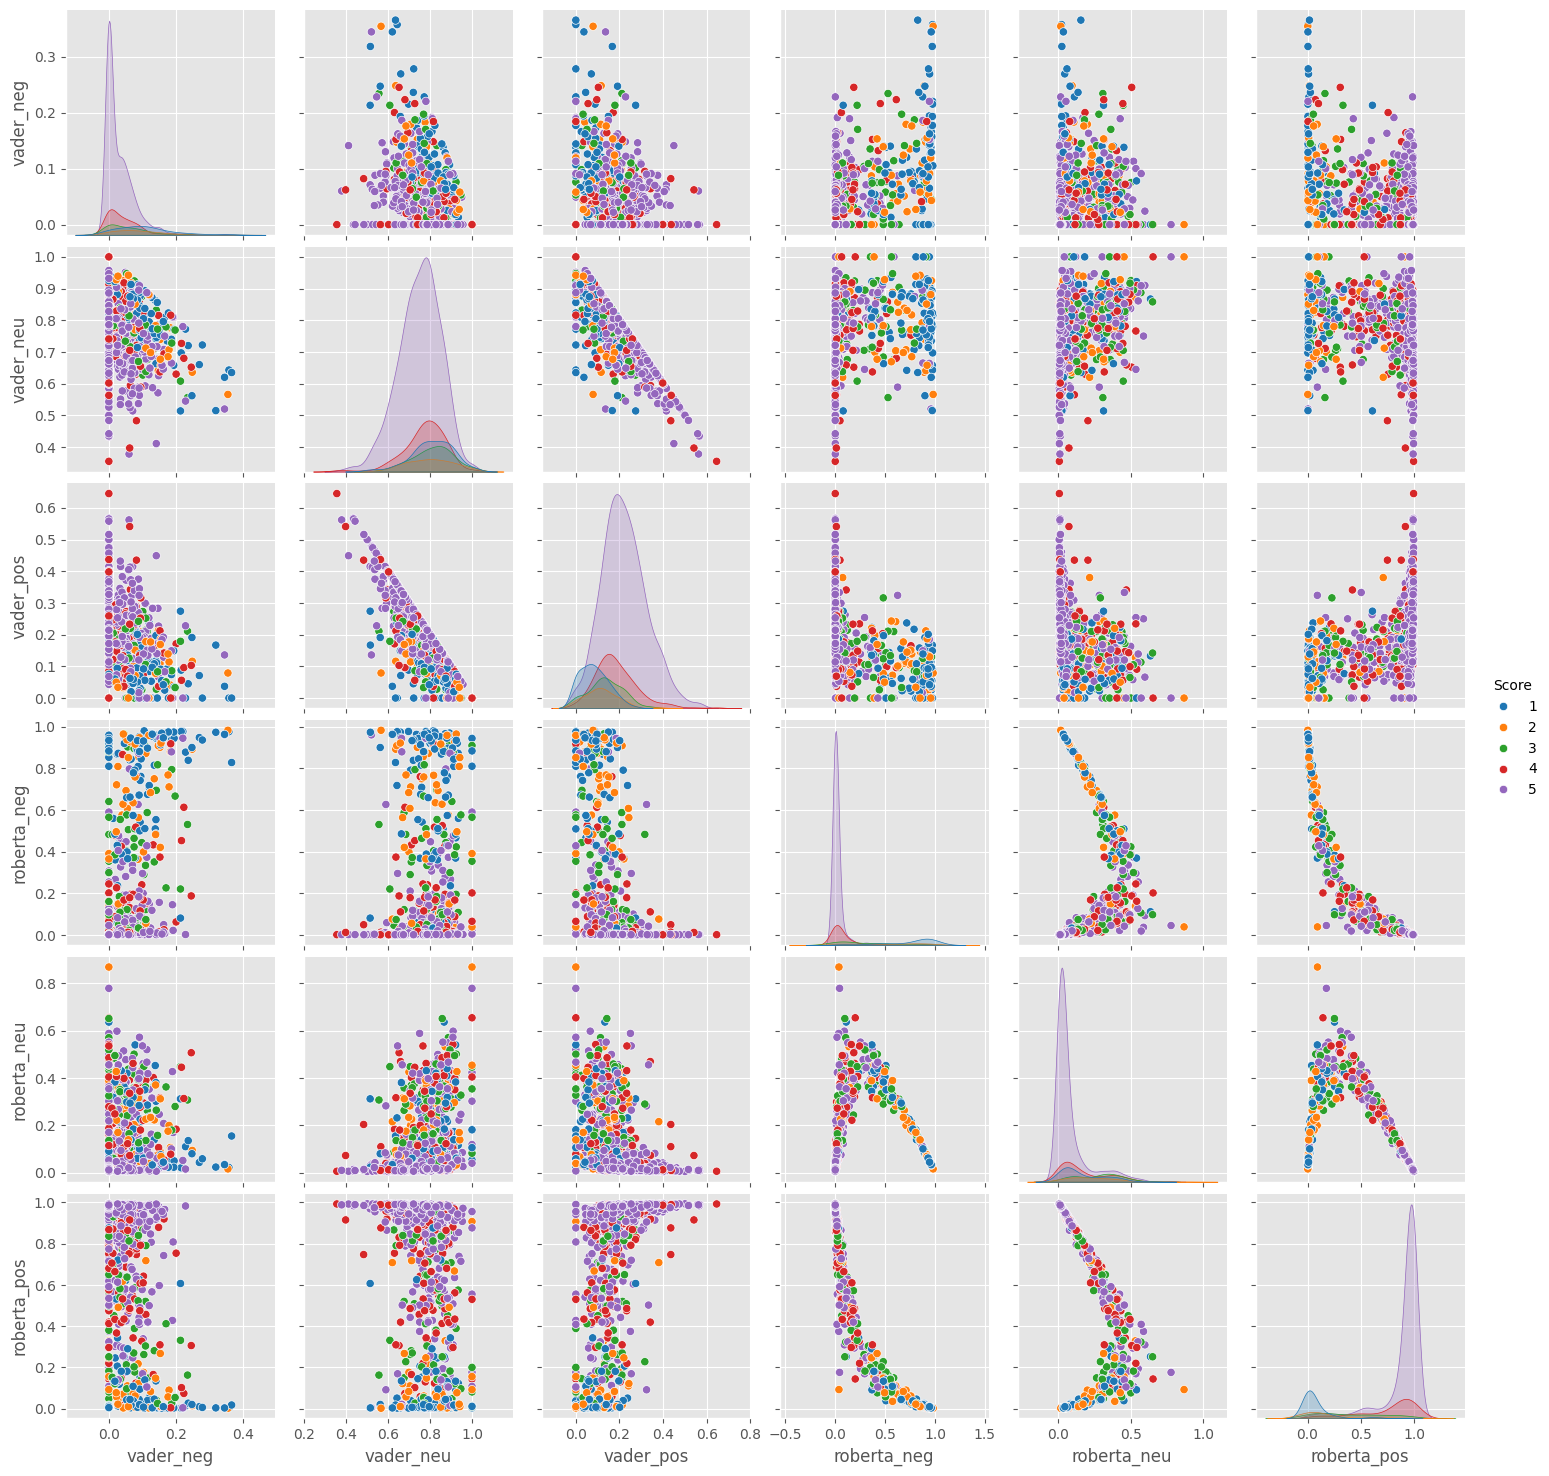

In [58]:
sns.pairplot(data =results_df, hue='Score', vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], palette = 'tab10')
plt.show()